# 价格水平历史 

本讲将讨论一些关于综合价格指数波动的历史数据。

我们首先安装必要的Python包。

`xlrd` 在这里被引入是因为 `pandas` 需要它来对Excel文件执行操作。

In [1]:
!pip install xlrd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 5.5 MB/s eta 0:00:00


<!-- Check for pandas>=2.1.4 for Google Collab Compat -->

In [2]:
from importlib.metadata import version
from packaging.version import Version

if Version(version("pandas")) < Version('2.1.4'):
    !pip install "pandas>=2.1.4"

我们现在导入本讲所需的Python库。

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import matplotlib as mpl
FONTPATH = "fonts/SourceHanSerifSC-SemiBold.otf"
mpl.font_manager.fontManager.addfont(FONTPATH)
plt.rcParams['font.family'] = ['Source Han Serif SC']

价格水平的增长率在媒体和央行及财政官员的口中称为**通货膨胀**。

价格水平是以国内货币单位对一组代表性消费品的单位进行衡量的。

因此，在美国，$t$时期的价格水平以美元（$t$月或$t$年）每消费品单位计量。

20世纪初之前，在许多西方经济体中，价格水平虽然年复一年地波动，但趋势不明显。

通常价格水平在一个世纪结束时与其开始时相近。

20世纪的情况则有所不同，我们将在本讲中看到。

一个广为接受的解释是20世纪初期各国放弃金本位和银本位制度。

```{tip}
本讲为后续几讲做好了铺垫，这些后续几讲中我们将讲述宏观经济学家用来思考价格水平决定因素的理论，即{doc}`cagan_ree` 和 {doc}`cagan_adaptive`
```

## 四个世纪的价格水平

我们首先展示最初出现在 {cite}`sargent2002big` 第35页的数据，其中包含了自1600年到1914年四个“硬通货”国家的价格水平。

* 法国
* 西班牙（卡斯蒂利亚）
* 英国
* 美国

在当前语境中，“硬通货”一词意味着这些国家采用了商品货币标准：货币由金银币组成，这些金银币的流通价值主要由它们的金银含量决定。

```{note}
在金本位或银本位制度下，一些货币也包括代表对金银币的纸质索取权的“仓库凭证”。政府或私人银行发行的银行票据可以视为此类“仓库凭证”的例子。
```

我们用`pandas`导入一个托管在Github上的[电子表格](https://github.com/QuantEcon/lecture-python-intro/tree/main/lectures/datasets)。

In [4]:
# 导入数据并清理索引
data_url = "https://github.com/QuantEcon/lecture-python-intro/raw/main/lectures/datasets/longprices.xls"
df_fig5 = pd.read_excel(data_url, 
                        sheet_name='all', 
                        header=2, 
                        index_col=0).iloc[1:]
df_fig5.index = df_fig5.index.astype(int)

我们首先绘制1600年至1914年间的价格水平。

在这段时间的大多数年份内，这些国家采用黄金或白银标准。

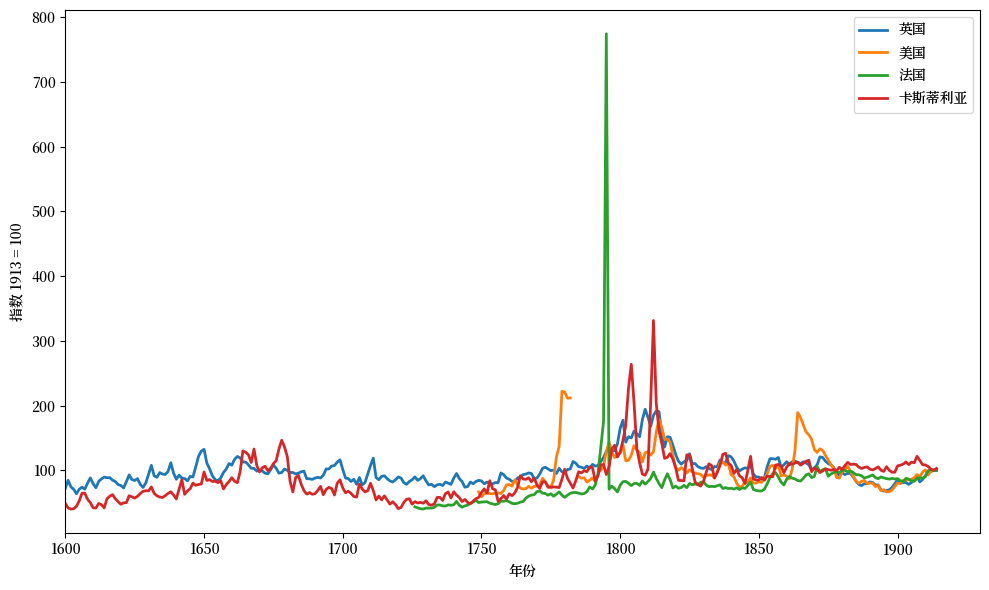

In [5]:
df_fig5_befe1914 = df_fig5[df_fig5.index <= 1914]

# 创建图表
cols = ['UK', 'US', 'France', 'Castile']
cols_cn = ['英国', '美国', '法国', '卡斯蒂利亚']

fig, ax = plt.subplots(figsize=(10,6))

for col, col_cn in zip(cols, cols_cn):
    ax.plot(df_fig5_befe1914.index, 
            df_fig5_befe1914[col], label=col_cn, lw=2)

ax.legend()
ax.set_ylabel('指数 1913 = 100')
ax.set_xlabel('年份')
ax.set_xlim(xmin=1600)
plt.tight_layout()
plt.show()

我们说“大多数年份”是因为金本位或银本位制度曾经有过暂时的中断。

通过仔细观察 {numref}`lrpl`，你可能能猜到这些中断发生的时间，因为这些时期的价格水平出现了显著的暂时性上涨：

* 1791-1797年在法国（法国大革命）
* 1776-1790年在美国（从大不列颠独立的战争）
* 1861-1865年在美国（南北战争）

在这些事件期间，当政府为了支付战争支出而印制纸币时，金银标准被暂时放弃。

```{note}
{doc}`french_rev` 描述了在法国大革命期间发生的大通胀前后的情况。
```

尽管出现了这些暂时的中断，图中一个显著的特点是三个世纪以来价格水平大致保持恒定。

在这个世纪初期，这些数据的另外两个特点引起了耶鲁大学的[Irving Fisher](https://en.wikipedia.org/wiki/Irving_Fisher)和剑桥大学的[John Maynard Keynes](https://en.wikipedia.org/wiki/John_Maynard_Keynes)的关注。

* 尽管长期锚定在相同的平均水平上，年度价格水平的波动还是很大
* 虽然使用有价值的黄金和白银作为硬币成功地通过限制货币供给稳定了价格水平，但这需要消耗现实的资源 --
* 一个国家使用金银币作为货币支付了高昂的“机会成本”——那些金银本可以制成有价值的珠宝和其他耐用品。

Keynes和Fisher提出了他们认为可以更有效地实现价格水平稳定的方式：

* 既能像金银标准下一样稳固地锚定价格水平，
* 也能减少年度短期波动。

他们说，中央银行可以通过以下方式实现价格水平的稳定

* 发行**有限供应**的纸币
* 拒绝印制钞票为政府支出提供资金

这种逻辑促使约翰-梅纳德-凯恩斯称商品本位制为 “野蛮的遗物”。

纸币或 “法定货币 ”体系会消耗掉货币背后的所有储备。

但是，坚持金本位制或银本位制提供了一种限制货币供应量的自动机制，从而锚定了价格水平。

为了锚定价格水平，纯粹的纸币或法定货币体系用中央银行取代了这一自动机制，中央银行拥有限制货币供应的权力和决心（并能阻止造假者！）。

现在，让我们通过展示原载于{cite}`sargent2002big`第35页的完整图表，来看看1914年之后，当四个国家相继脱离金/银本位制时，它们的物价水平发生了什么变化。

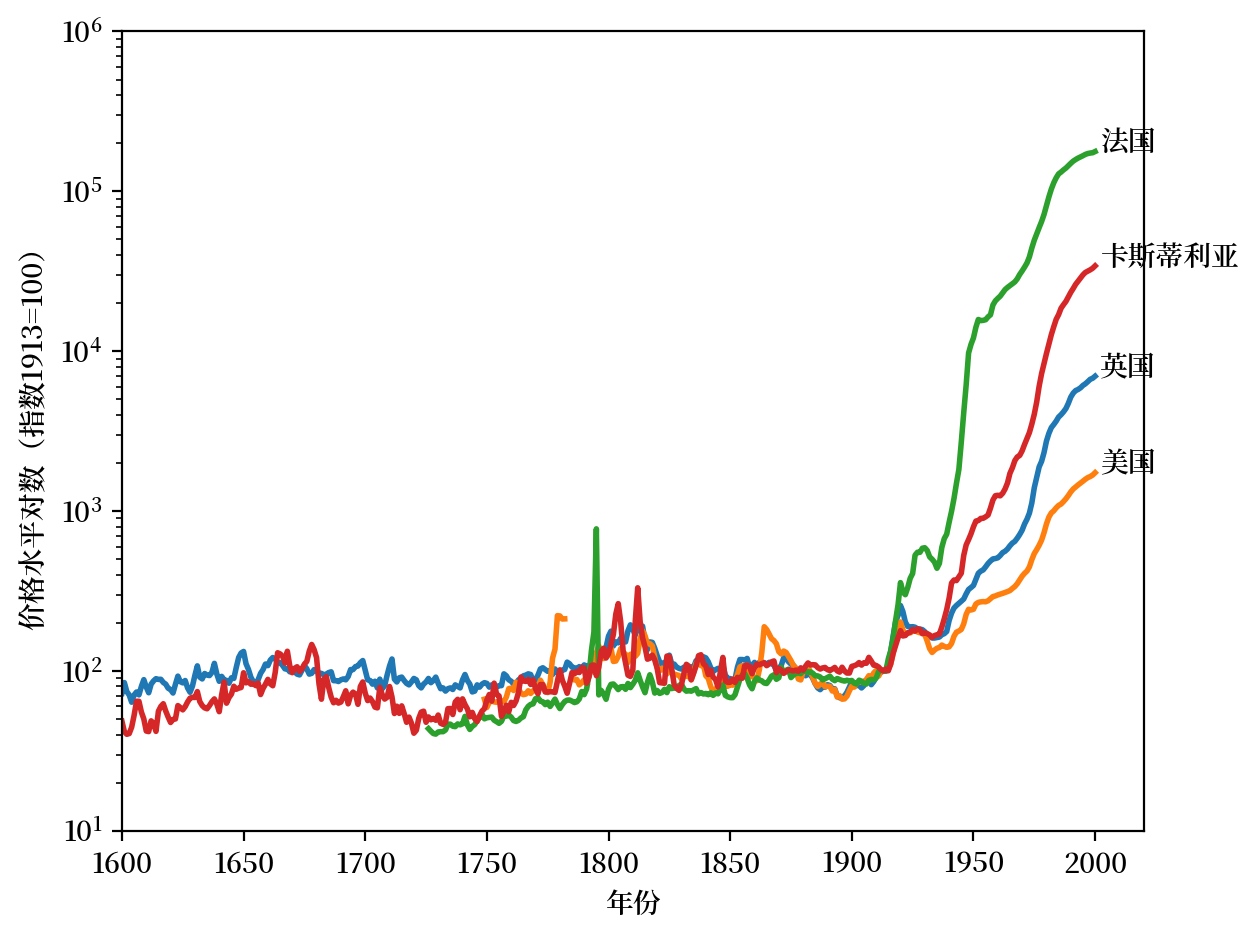

In [6]:
fig, ax = plt.subplots(dpi=200)

for col, col_cn in zip(cols, cols_cn):
    ax.plot(df_fig5.index, df_fig5[col], lw=2)
    ax.text(x=df_fig5.index[-1]+2, 
            y=df_fig5[col].iloc[-1], s=col_cn)

ax.set_yscale('log')
ax.set_ylabel('价格水平对数（指数1913=100）')
ax.set_ylim([10, 1e6])
ax.set_xlabel('年份')
ax.set_xlim(xmin=1600)
plt.tight_layout()
plt.show()

{numref}`lrpl_lg`显示，印制纸币的中央银行在锚定价格水平方面的表现不如金本位和标准银本位。

这可能会让Keynes和Fisher感到惊讶或失望。

事实上，早在Keynes和Fisher在20世纪初倡导法定货币制度之前，早期的经济学家和政治家们就知道法定货币制度的可能性。

商品货币体系的支持者不相信政府和中央银行能够妥善管理法定货币体系。

他们愿意支付与建立和维护商品货币体系相关的资源成本。

鉴于许多国家在20世纪放弃商品货币后经历了持续的高通胀，金本位制或银本位制的倡导者倾向于维持1914年前的金/银本位制也是情有可原的。

二十世纪在纸币法定本位制下经历的通货膨胀的广度和长度在历史上都是前所未有的。

## 四次大通胀

在 1918 年 11 月结束的第一次世界大战之后，货币和财政当局艰难地在尝试不实行金本位或银本位的情况下实现价格水平的稳定。

我们展示了{cite}`sargent2013rational`第3章 “四次大通胀的结局 ”中的四幅图。

这些图表描述了第一次世界大战后初期四个国家价格水平的对数：

* 图 3.1：1921-1924 年奥地利的零售价格（第 42 页）
* 图 3.2：1921-1924 年匈牙利的批发价格（第 43 页）
* 图 3.3：批发价格，波兰，1921-1924 年（第 44 页）
* 图 3.4：批发价格，德国，1919-1924 年（第 45 页）


我们在四幅图中的每一幅都加上了相对美元汇率的对数。
引自{cite}`sargent2013rational`第3章。

图表的基础数据载于{cite}`sargent2013rational`第3章附录中的表格。
我们将所有这些数据转录到电子表格 {download}`chapter_3.xlsx <https://github.com/QuantEcon/lecture-python-intro/raw/main/lectures/datasets/chapter_3.xlsx>` 中，并将其读入 pandas。

在下面的代码单元中，我们将清理数据并构建一个 `pandas.dataframe`。

In [7]:
def process_entry(entry):
    "清理数据帧的每个条目"
    
    if type(entry) == str:
        # 删除前导和尾部空白
        entry = entry.strip()
        # 删除逗号
        entry = entry.replace(',', '')
    
        # 删除 HTML 标记
        item_to_remove = ['<s>a</s>', '<s>c</s>', 
                          '<s>d</s>', '<s>e</s>']

        # <s>b</s> 代表十亿
        if '<s>b</s>' in entry:
            entry = entry.replace('<s>b</s>', '')
            entry = float(entry) * 1e9
        else:
            for item in item_to_remove:
                if item in entry:
                    entry = entry.replace(item, '')
    return entry

def process_df(df):
    "Clean and reorganize the entire dataframe."
    
    # 删除列名中的 HTML 标记
    for item in ['<s>a</s>', '<s>c</s>', '<s>d</s>', '<s>e</s>']:
        df.columns = df.columns.str.replace(item, '')
        
    # 将年份转换为整数
    df['Year'] = df['Year'].apply(lambda x: int(x))
    
    # 将索引设置为包含年月的日期时间
    df = df.set_index(
            pd.to_datetime(
                (df['Year'].astype(str) + \
                 df['Month'].astype(str)), 
                format='%Y%B'))
    df = df.drop(['Year', 'Month'], axis=1)
    
     # 处理重复数据，保留第一个数据 
    df = df[~df.index.duplicated(keep='first')]
    
   # 将属性值转换为数字
    df = df.map(lambda x: float(x) \
                if x != '—' else np.nan)
    
    # 最后，我们只关注 1919 年到 1925 年之间的数据
    mask = (df.index >= '1919-01-01') & \
           (df.index < '1925-01-01')
    df = df.loc[mask]

    return df

现在，我们编写了绘图函数 `pe_plot` 和 `pr_plot` ，它们将绘制出显示价格水平、汇率和通货膨胀率的图表、和通货膨胀率。

In [8]:
def pe_plot(p_seq, e_seq, index, labs, ax):
    "生成价格和汇率图"

    p_lab, e_lab = labs
    
    # 绘制价格和汇率图
    ax.plot(index, p_seq, label=p_lab, color='tab:blue', lw=2)
    
    # 添加新轴
    ax1 = ax.twinx()
    ax1.plot([None], [None], label=p_lab, color='tab:blue', lw=2)
    ax1.plot(index, e_seq, label=e_lab, color='tab:orange', lw=2)
    
    # 设置对数轴
    ax.set_yscale('log')
    ax1.set_yscale('log')
    
    # 定义轴标签格式
    ax.xaxis.set_major_locator(
        mdates.MonthLocator(interval=5))
    ax.xaxis.set_major_formatter(
        mdates.DateFormatter('%b %Y'))
    for label in ax.get_xticklabels():
        label.set_rotation(45)
    
    # 设置标签
    ax.set_ylabel('价格水平')
    ax1.set_ylabel('汇率')
  
    ax1.legend(loc='upper left')
    
    return ax1

def pr_plot(p_seq, index, ax):
    "生成通货膨胀率图"

    # 计算对数 p_seq 的差值
    log_diff_p = np.diff(np.log(p_seq))
    
    # 计算并绘制移动平均值
    diff_smooth = pd.DataFrame(log_diff_p).rolling(3, center=True).mean()
    ax.plot(index[1:], diff_smooth, label='移动平均数（3 期）', alpha=0.5, lw=2)
    ax.set_ylabel('通胀率')
    
    ax.xaxis.set_major_locator(
        mdates.MonthLocator(interval=5))
    ax.xaxis.set_major_formatter(
        mdates.DateFormatter('%b %Y'))
    
    for label in ax.get_xticklabels():
        label.set_rotation(45)
    
    ax.legend()

    return ax

接下来我们为每个国家准备数据

In [9]:
# 导入数据
data_url = "https://github.com/QuantEcon/lecture-python-intro/raw/main/lectures/datasets/chapter_3.xlsx"
xls = pd.ExcelFile(data_url)

# 选择相关的数据表
sheet_index = [(2, 3, 4), 
               (9, 10), 
               (14, 15, 16), 
               (21, 18, 19)]

# 删除多余的行
remove_row = [(-2, -2, -2), 
              (-7, -10), 
              (-6, -4, -3), 
              (-19, -3, -6)]

# 对每个国家的序列进行解包和合并
df_list = []

for i in range(4):
    
    indices, rows = sheet_index[i], remove_row[i]
    
    # 在选定的工作表上应用 process_entry
    sheet_list = [
        pd.read_excel(xls, 'Table3.' + str(ind), 
            header=1).iloc[:row].map(process_entry)
        for ind, row in zip(indices, rows)]
    
    sheet_list = [process_df(df) for df in sheet_list]
    df_list.append(pd.concat(sheet_list, axis=1))

df_aus, df_hun, df_pol, df_deu = df_list

现在，让我们为四个国家绘制图表。

我们将为每个国家绘制两幅图。

第一幅图绘制的是 

* 价格水平
* 相对于美元的汇率

对于每个国家，图表右侧的刻度与价格水平有关，而图表左侧的刻度与汇率有关。

对于每个国家，第二张图表绘制的是通货膨胀率的三个月居中移动平均值，定义为 $\frac{p_{t-1}+p_t+p_{t+1}}{3}$。

### 奥地利

我们的数据来源是

* 表 3.3，零售价格水平 $\exp p$
* 表 3.4，与美国的汇率

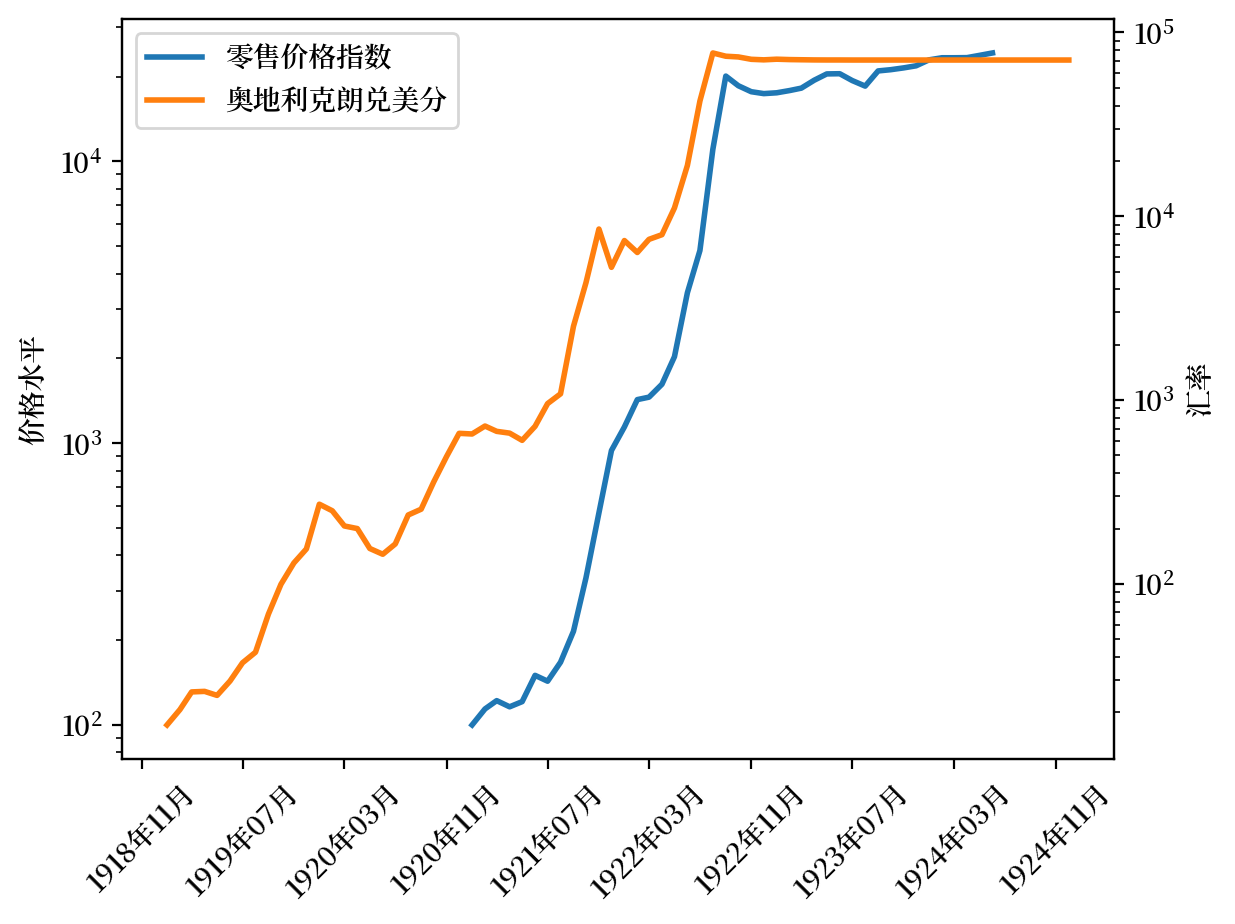

In [10]:
p_seq = df_aus['Retail price index, 52 commodities']
e_seq = df_aus['Exchange Rate']

lab = ['零售价格指数', 
       '奥地利克朗兑美分']

# 创建图表
fig, ax = plt.subplots(dpi=200)
ax1 = pe_plot(p_seq, e_seq, df_aus.index, lab, ax)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=8))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y年%m月'))

plt.show()

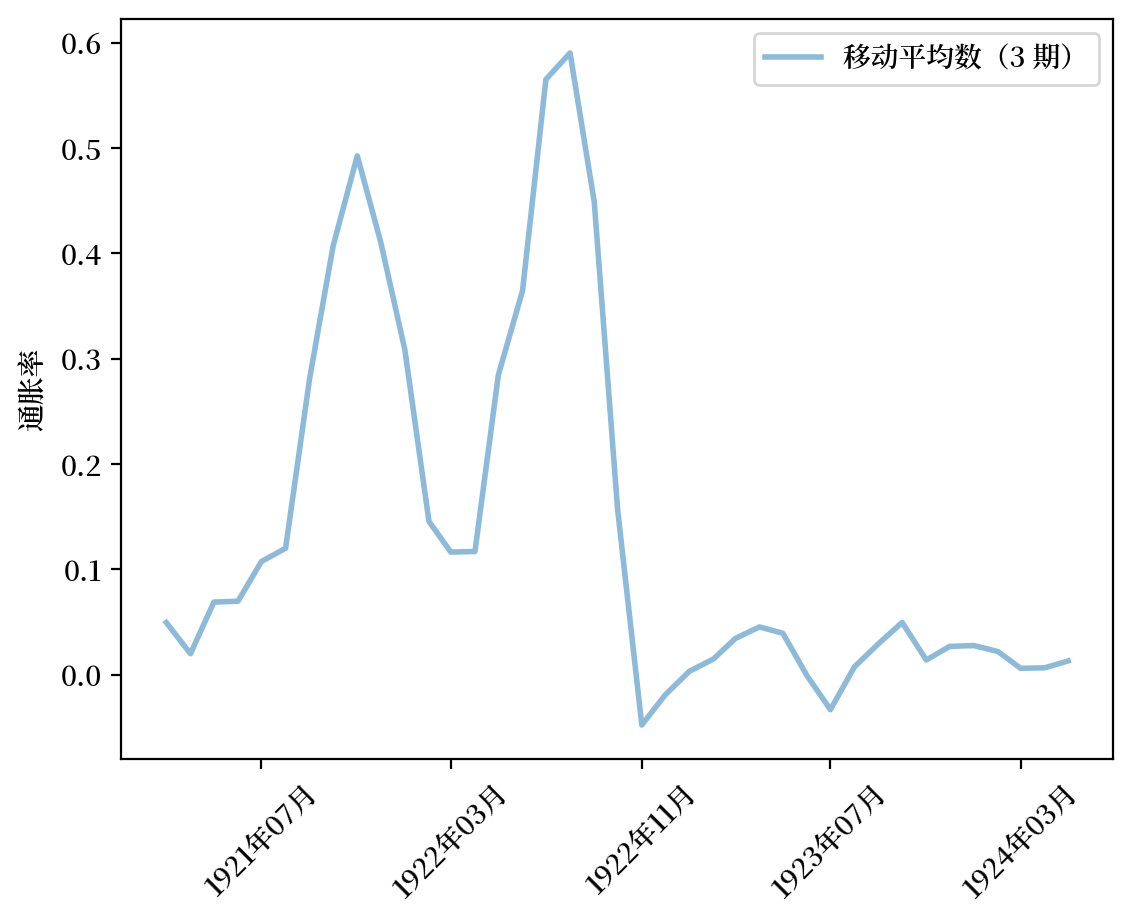

In [11]:
# 绘制移动平均线
fig, ax = plt.subplots(dpi=200)
ax1 = pr_plot(p_seq, df_aus.index, ax)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=8))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y年%m月'))

plt.show()

观察 {numref}`pi_xrate_austria` 和 {numref}`inflationrate_austria` 我们可以看到：

* "超级通货膨胀"的一段时期中，价格水平的对数迅速上升，月通胀率非常高
* 超级通货膨胀的突然停止，表现为价格水平的对数的突然变平，以及三个月平均通胀率的显著永久下降
* 美元汇率跟随价格水平走势。

我们将在接下来的三个案例中看到类似的模式。

### 匈牙利

我们的数据来源为：

* 表 3.10，价格水平 $\exp p$ 和汇率

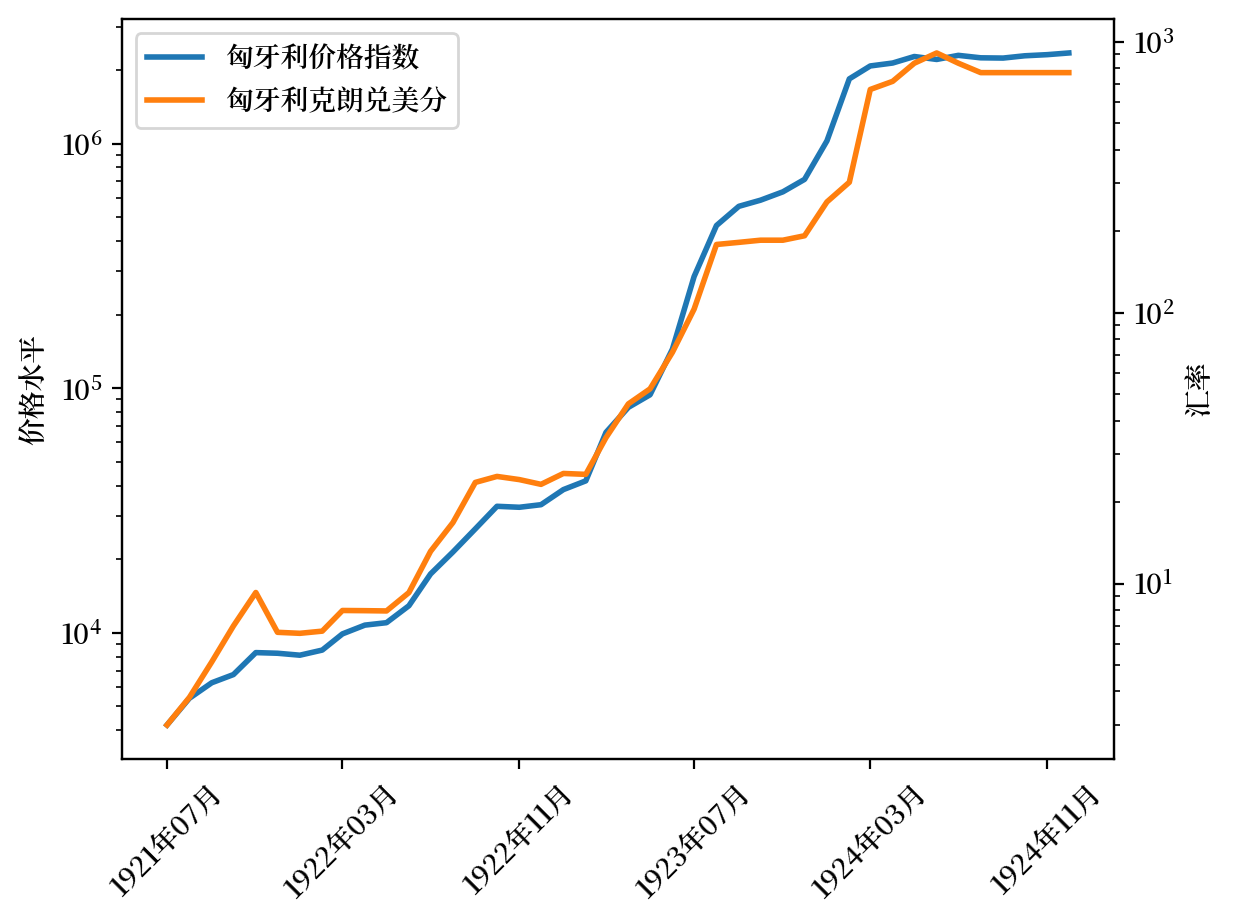

In [12]:
p_seq = df_hun['Hungarian index of prices']
e_seq = 1 / df_hun['Cents per crown in New York']

lab = ['匈牙利价格指数', 
       '匈牙利克朗兑美分']

# 创建图表
fig, ax = plt.subplots(dpi=200)
ax1 = pe_plot(p_seq, e_seq, df_hun.index, lab, ax)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=8))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y年%m月'))

plt.show()

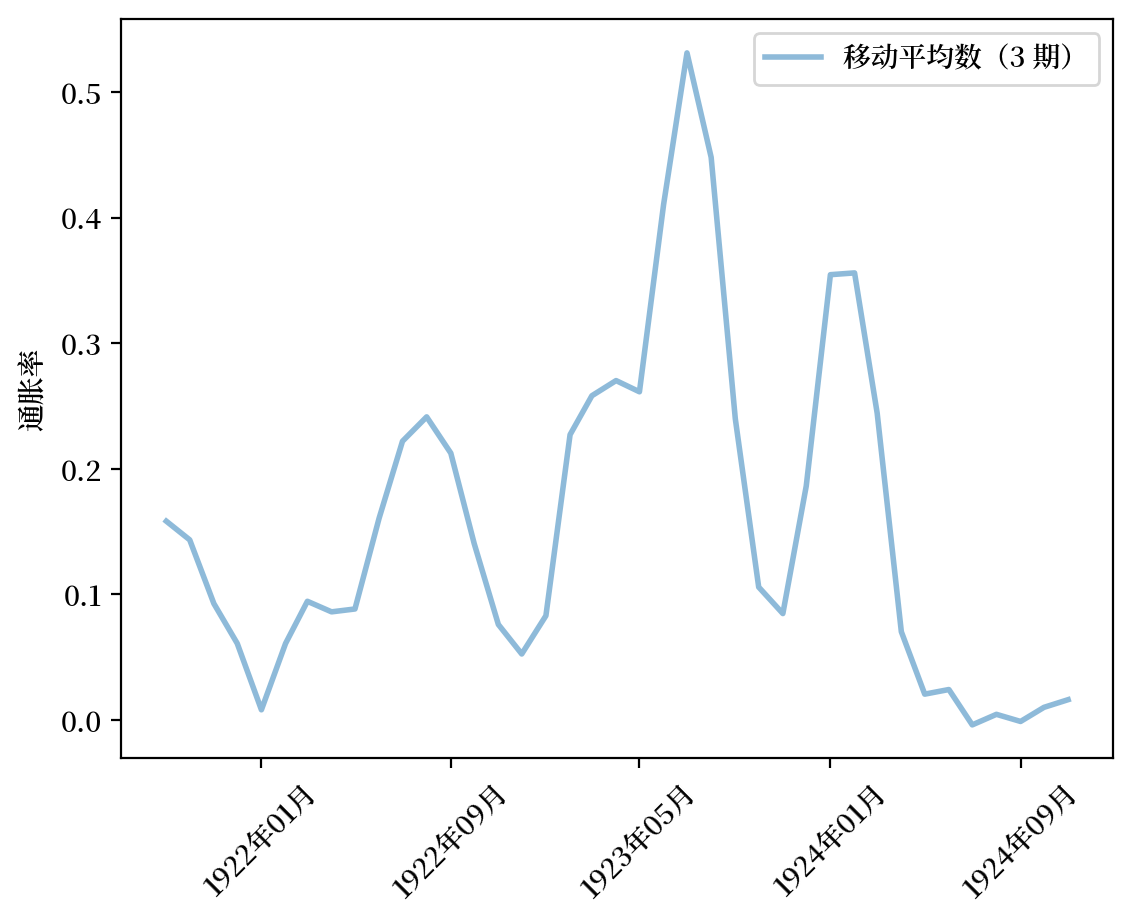

In [13]:
# 绘制移动平均线
fig, ax = plt.subplots(dpi=200)
ax1 = pr_plot(p_seq, df_hun.index, ax)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=8))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y年%m月'))
plt.show()

### 波兰

波兰的数据来源如下

* 表 3.15，价格水平 $\exp p$ 
* 表 3.15，汇率

```{note}
为了根据电子表格中的数据构建价格水平序列，我们遵循 {cite}`sargent2013rational` 第 3 章中的相同程序。我们拼接了三个系列--批发价格指数、批发价格指数： 纸币批发价格指数和兹罗提批发价格指数： 按兹罗提计算。我们根据可获得的前一序列最后一期的价格水平比率调整了序列，并将它们粘合在一起，构建了一个单一序列。
我们放弃了 1924 年 6 月采用兹罗提后的汇率。这样做是因为我们没有以兹罗提为单位的价格。我们使用 6 月份的旧货币来计算汇率调整。
```

In [14]:
# Splice three price series in different units
p_seq1 = df_pol['Wholesale price index'].copy()
p_seq2 = df_pol['Wholesale Price Index: '
                'On paper currency basis'].copy()
p_seq3 = df_pol['Wholesale Price Index: ' 
                'On zloty basis'].copy()

# Non-nan part
mask_1 = p_seq1[~p_seq1.isna()].index[-1]
mask_2 = p_seq2[~p_seq2.isna()].index[-2]

adj_ratio12 = (p_seq1[mask_1] / p_seq2[mask_1])
adj_ratio23 = (p_seq2[mask_2] / p_seq3[mask_2])

# Glue three series
p_seq = pd.concat([p_seq1[:mask_1], 
                   adj_ratio12 * p_seq2[mask_1:mask_2], 
                   adj_ratio23 * p_seq3[mask_2:]])
p_seq = p_seq[~p_seq.index.duplicated(keep='first')]

# Exchange rate
e_seq = 1/df_pol['Cents per Polish mark (zloty after May 1924)']
e_seq[e_seq.index > '05-01-1924'] = np.nan

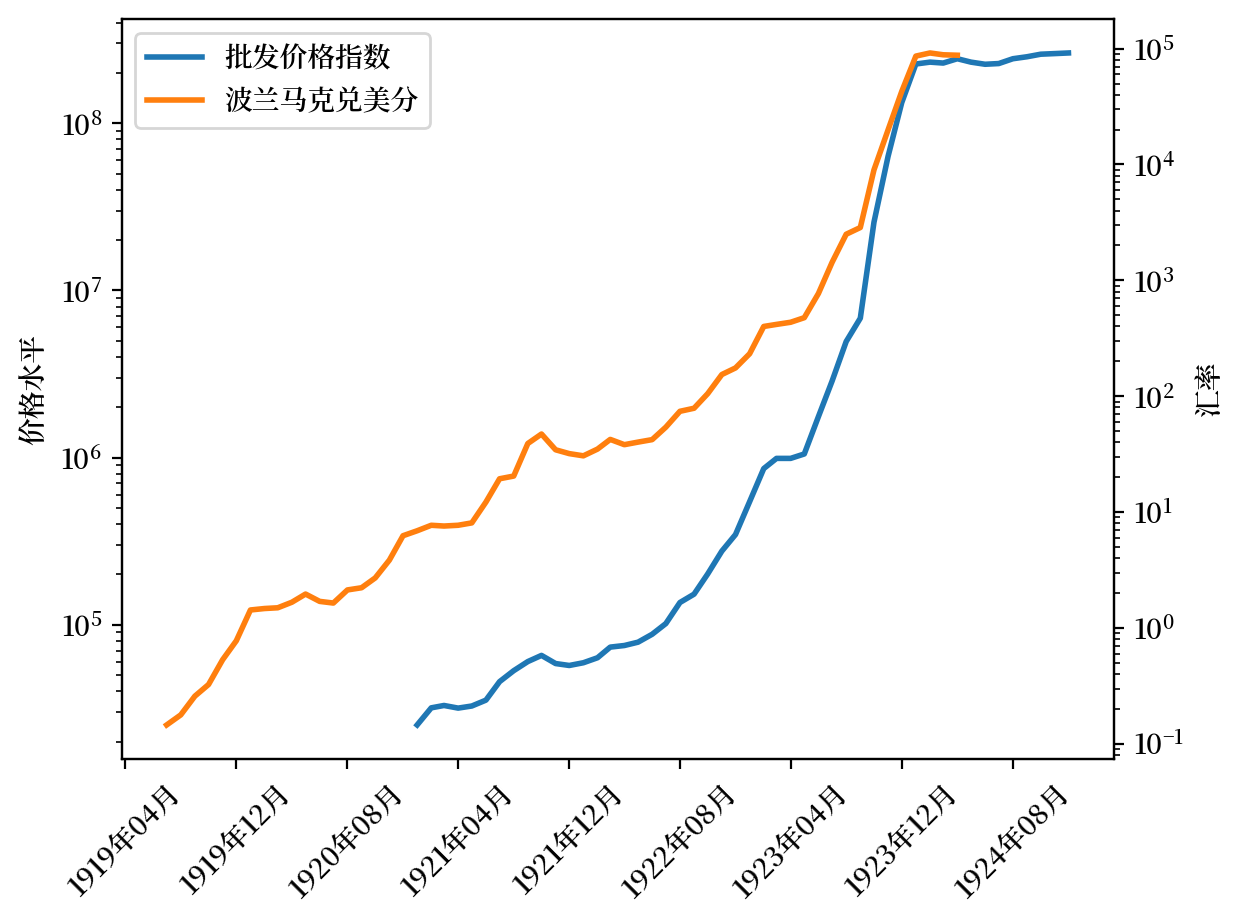

In [15]:
lab = ['批发价格指数', 
       '波兰马克兑美分']

# 创建图表
fig, ax = plt.subplots(dpi=200)
ax1 = pe_plot(p_seq, e_seq, df_pol.index, lab, ax)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=8))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y年%m月'))
plt.show()

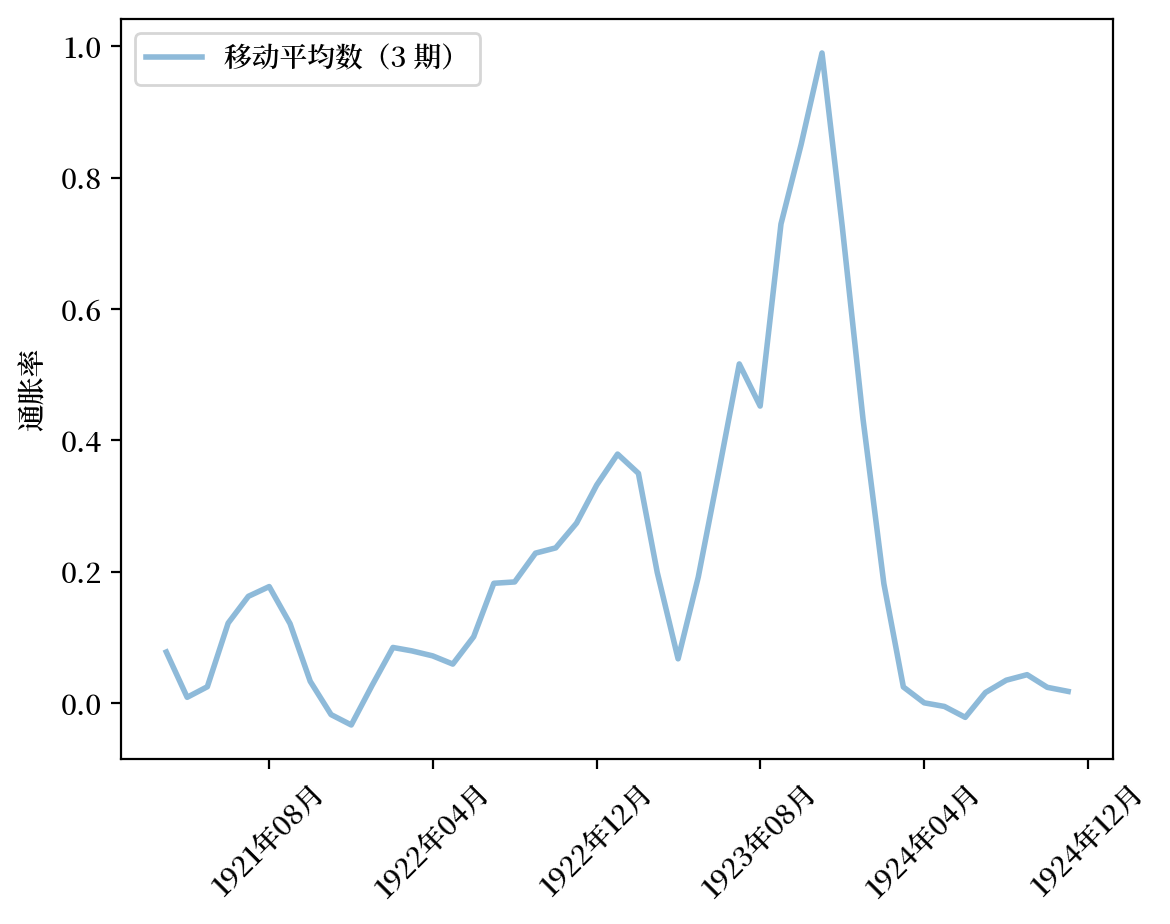

In [16]:
# 绘制移动平均线
fig, ax = plt.subplots(dpi=200)
ax1 = pr_plot(p_seq, df_pol.index, ax)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=8))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y年%m月'))

plt.show()

### 德国

德国的数据来源于{cite}`sargent2013rational`第 3 章中的以下表格：

* 表 3.18，批发价格水平 $\exp p$ 
* 表 3.19，汇率

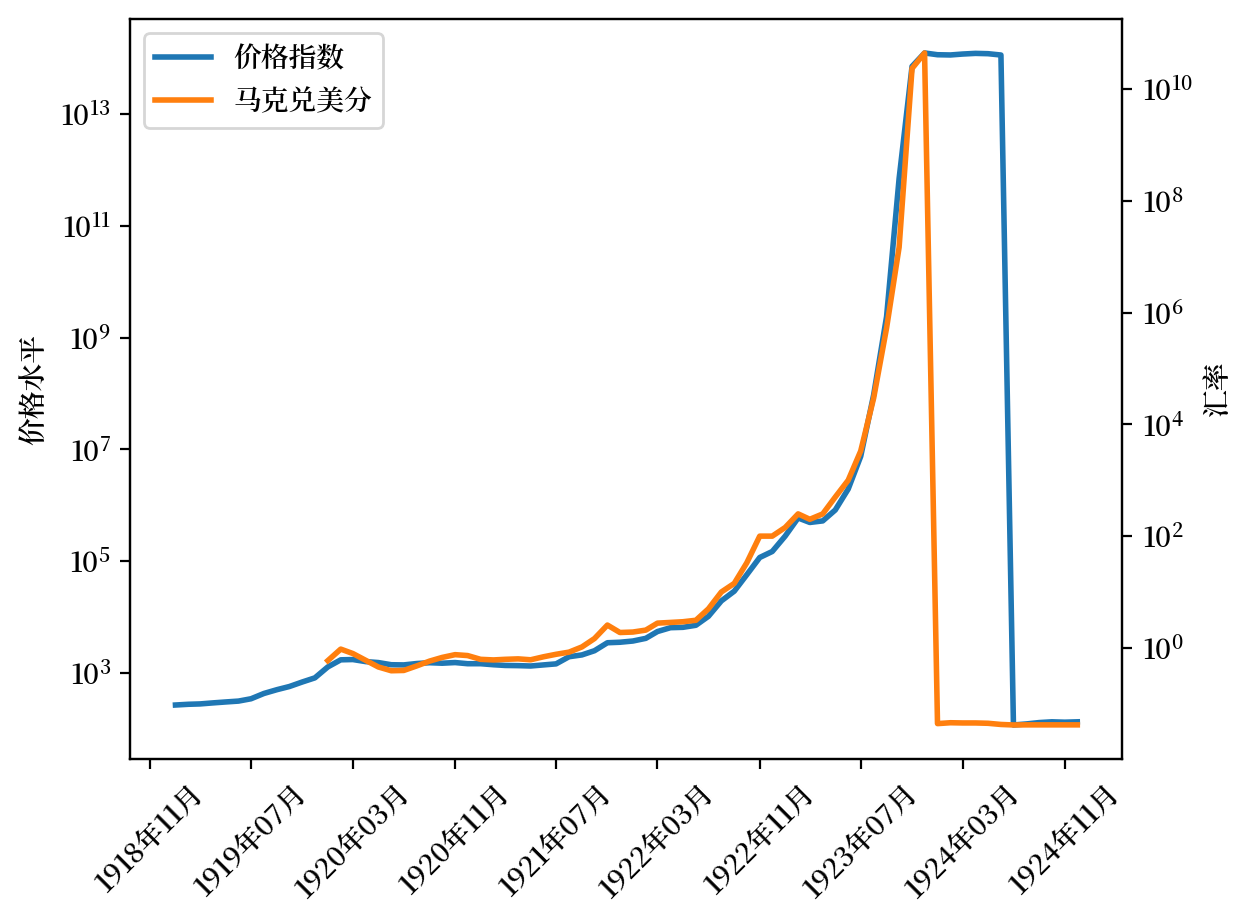

In [17]:
p_seq = df_deu['Price index (on basis of marks before July 1924,'
                '  reichsmarks after)'].copy()
e_seq = 1/df_deu['Cents per mark']

lab = ['价格指数', 
       '马克兑美分']

# 创建图表
fig, ax = plt.subplots(dpi=200)
ax1 = pe_plot(p_seq, e_seq, df_deu.index, lab, ax)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=8))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y年%m月'))

plt.show()

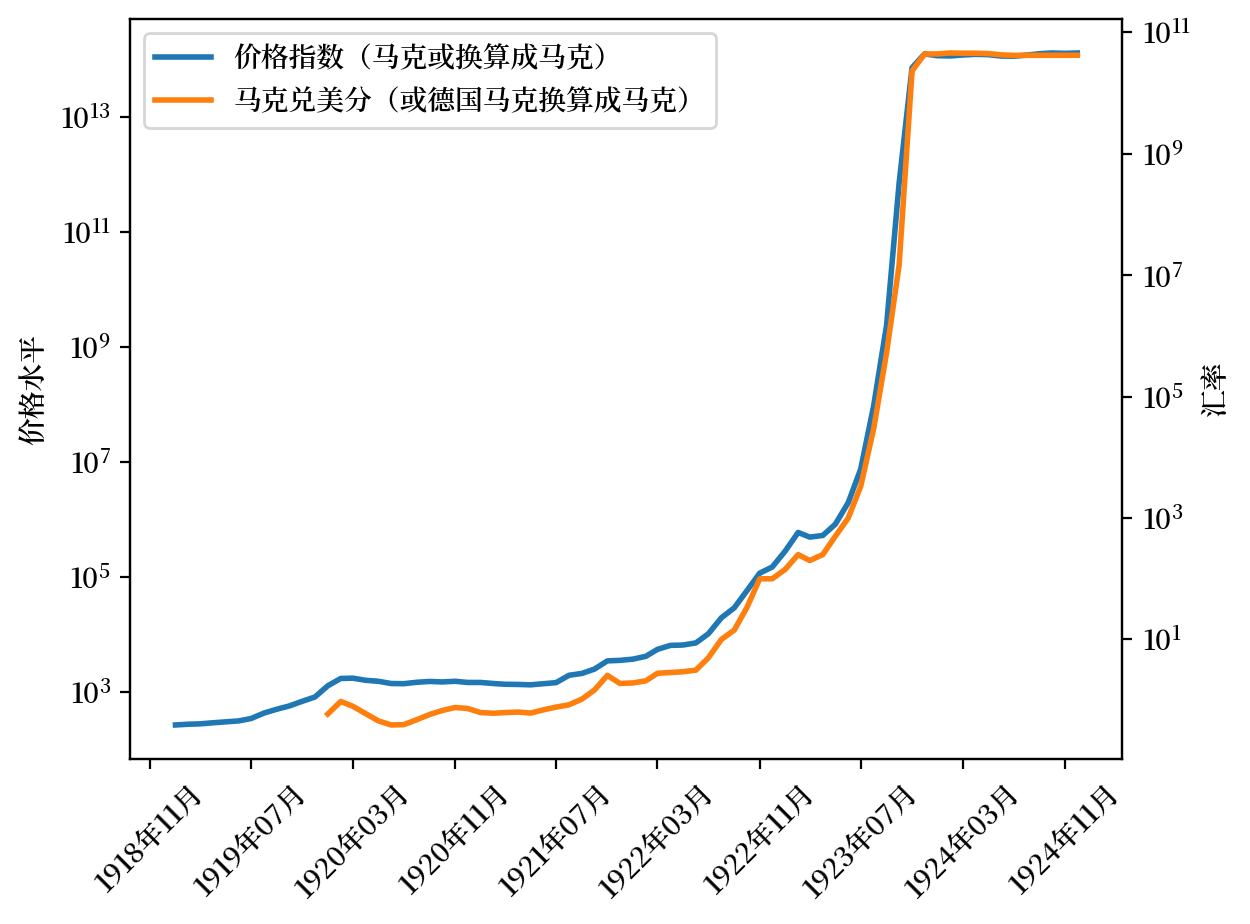

In [18]:
p_seq = df_deu['Price index (on basis of marks before July 1924,'
                '  reichsmarks after)'].copy()
e_seq = 1/df_deu['Cents per mark'].copy()

# 货币改革后调整价格水平/汇率
p_seq[p_seq.index > '06-01-1924'] = p_seq[p_seq.index 
                                          > '06-01-1924'] * 1e12
e_seq[e_seq.index > '12-01-1923'] = e_seq[e_seq.index 
                                          > '12-01-1923'] * 1e12

lab = ['价格指数（马克或换算成马克）', 
       '马克兑美分（或德国马克换算成马克）']

# Create plot
fig, ax = plt.subplots(dpi=200)
ax1 = pe_plot(p_seq, e_seq, df_deu.index, lab, ax)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=8))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y年%m月'))

plt.show()

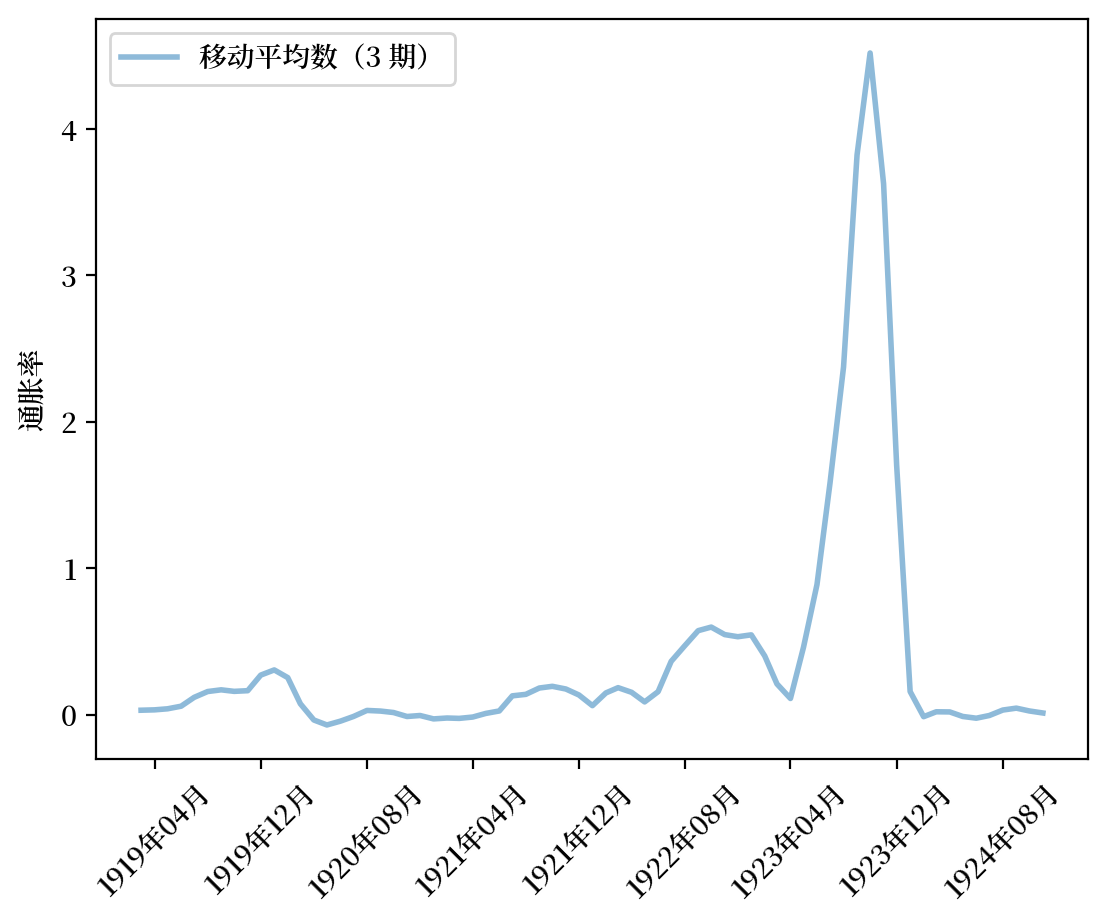

In [19]:
# 绘制移动平均线
fig, ax = plt.subplots(dpi=200)
ax1 = pr_plot(p_seq, df_deu.index, ax)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=8))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y年%m月'))
plt.show()

## 大通胀的开始和停止

奥地利、匈牙利、波兰和德国的价格水平在快速上升后，下降得如此之快，这一现象令人瞩目。

这些“突然停止”还表现在上述四个国家的三个月移动平均通胀率的永久性下降中。

此外，这四个国家的美元汇率走势与其价格水平相似。

```{note}
这种模式是汇率兑换率理论中[购买力平价理论](https://en.wikipedia.org/wiki/Purchasing_power_parity)的一个实例。
```

这些大通胀似乎都“在一瞬间停止”。

{cite}`sargent2002big` 的第3章对这一显著模式提供了解释。

简而言之，他们提供的解释如下。

一战后，美国实行了金本位制。

美国政府随时准备按指定数量的金子兑换一美元。

一战后，匈牙利、奥地利、波兰和德国没有立刻实行金本位制。

他们的货币是“法定”或“无支持”的，意思是他们不受政府将其兑换成金银币的可信承诺的支持。

政府可以印制新的纸币来支付货物和服务。

```{note}
从技术上讲，这些票据主要由国库券支持。但人们不能指望这些国库券会通过征税来偿还，而是通过印制更多的票据或国库券来偿还。
```

这种行为的规模之大，导致了各国货币的惊人贬值。 

{cite}`sargent2002big`第3章描述了匈牙利、奥地利、波兰和德国为结束恶性通货膨胀而刻意改变政策的情况。

每个国家的政府都停止印刷钞票来支付商品和服务，并使本国货币可兑换成美元或英镑。

{cite}`sargent2002big`中讲述的故事是以{doc}`cagan_ree`和{doc}`cagan_adaptive`中描述的价格水平货币主义理论为基础的。

这些章节讨论了这些快速贬值货币的持有者在想什么，以及他们的信念如何影响通货膨胀对政府货币和财政政策的反应。